In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [26]:
df_routes=pd.read_csv('../Files/Routes.csv')




In [27]:
df_routes.head(2)

,Route_Id,Origin_Port,Destination_Port,Orgin_Port_Country,Destination_Port_Country,No_Of_Stops,Stops_Names,Stop_Points,Distance,Average_Transit_Days,Travel_Direction,Vessel_Type,No_Of_Travels,Total_Incidents_Count,Risk_Score
0,R001,Tanger Med,Rotterdam,Morocco,Netherlands,NaN,"Algeciras,Barcelona, Antwerp","[44.811855,-0.5906289]-[36.1311725,-5.4473991]...",600,18,W,Bulk carrier,3161,136,16
1,R002,Gioia Tauro,Hamburg,Italy,Germany,NaN,"Gioia Tauro,Valencia,Barcelona,Marseille,Rotte...","[38.424938, 15.899940]-[40.7127281,-74.0060152...",2468,29,E,Tank,2065,150,28


In [28]:
df_incidents=pd.read_csv('../Files/Incidents.csv')

In [29]:
df_routes.head(2)
df_incidents.head(2)

,Incident_Id,Route_Id,Incident_Type,Severity,Incident_Date,Description
0,INC001,R538,Health Emergencies,High,5/24/23 13:58,Medical issues among crew affecting operations.
1,INC002,R401,Fuel Costs,Medium,9/25/23 13:58,Fluctuations in fuel prices affecting operatin...


In [30]:
# Convert 'date' column to datetime with the correct format
df_incidents['Incident_Date'] = pd.to_datetime(df_incidents['Incident_Date'])

C:\Users\ponsi\AppData\Local\Temp\ipykernel_24600\1099830727.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_incidents['Incident_Date'] = pd.to_datetime(df_incidents['Incident_Date'])


In [31]:
# Current date
current_date = datetime.now()

# Function to get the date 5 months ago
def date_n_months_ago(current_date, n):
    return current_date - timedelta(days=n*30)  # Approximate 5 months as 150 days

five_months_ago = date_n_months_ago(current_date, 5)

In [32]:
# Adding columns to routes dataframe
df_routes['Total_Incidents_Count'] = 0
df_routes['high_incidents'] = 0
df_routes['high_last5Month_incidents'] = 0
df_routes['medium_incidents'] = 0
df_routes['medium_last5Month_incidents'] = 0
df_routes['low_incidents'] = 0
df_routes['low_last5Month_incidents'] = 0


In [33]:


for index,row in df_routes.iterrows():
    #total incidents and count
    route_incidents=df_incidents[df_incidents['Route_Id']==row['Route_Id']]   
    incidents_count=route_incidents.shape[0]
    df_routes.loc[index, 'Total_Incidents_Count']=incidents_count
    
    #High incidents and count
    high_incidents = route_incidents[route_incidents['Severity'] == 'High']
    high_count=high_incidents.shape[0]
    high_last5Month_count=high_incidents[high_incidents['Incident_Date']>five_months_ago].shape[0]

    df_routes.loc[index, 'high_incidents']=(high_count-high_last5Month_count)
    df_routes.loc[index, 'high_last5Month_incidents']=high_last5Month_count

    
    
    #Medium incidents and count
    medium_incidents = route_incidents[route_incidents['Severity'] == 'Medium']
    medium_count=medium_incidents.shape[0]
    medium_last5Month_count=medium_incidents[medium_incidents['Incident_Date']>five_months_ago].shape[0]
    df_routes.loc[index, 'medium_incidents'] = (medium_count-medium_last5Month_count)
    df_routes.loc[index, 'medium_last5Month_incidents'] = medium_last5Month_count
    
        #Medium incidents and count
    low_incidents = route_incidents[route_incidents['Severity'] == 'Low']
    low_count=low_incidents.shape[0]
    low_last5Month_count=low_incidents[low_incidents['Incident_Date']>five_months_ago].shape[0]
    df_routes.loc[index, 'low_incidents'] = (low_count-low_last5Month_count)
    df_routes.loc[index, 'low_last5Month_incidents'] =low_last5Month_count
    


    
    


In [34]:
df_routes.head(2)

,Route_Id,Origin_Port,Destination_Port,Orgin_Port_Country,Destination_Port_Country,No_Of_Stops,Stops_Names,Stop_Points,Distance,Average_Transit_Days,...,Vessel_Type,No_Of_Travels,Total_Incidents_Count,Risk_Score,high_incidents,high_last5Month_incidents,medium_incidents,medium_last5Month_incidents,low_incidents,low_last5Month_incidents
0,R001,Tanger Med,Rotterdam,Morocco,Netherlands,NaN,"Algeciras,Barcelona, Antwerp","[44.811855,-0.5906289]-[36.1311725,-5.4473991]...",600,18,...,Bulk carrier,3161,136,16,41,9,39,5,34,8
1,R002,Gioia Tauro,Hamburg,Italy,Germany,NaN,"Gioia Tauro,Valencia,Barcelona,Marseille,Rotte...","[38.424938, 15.899940]-[40.7127281,-74.0060152...",2468,29,...,Tank,2065,150,28,47,12,39,11,36,5


In [35]:
# Adding columns to routes dataframe
df_routes['Risk_Score'] = 0

In [36]:

for index,row in df_routes.iterrows():
    total_travel_count=row['No_Of_Travels']
    Total_Incidents_Count=row['Total_Incidents_Count'] #200
    high_incidents=row['high_incidents'] #*3
    high_last5Month_incidents=row['high_last5Month_incidents'] #*5
    
    medium_incidents=row['medium_incidents'] #*2
    medium_last5Month_incidents=row['medium_last5Month_incidents'] #*3
    
    low_incidents=row['low_incidents'] #*1
    low_last5Month_incidents=row['low_last5Month_incidents'] #*2
    
    risk_value=((high_incidents*5)+(high_last5Month_incidents*7)+\
        (medium_incidents*3)+(medium_last5Month_incidents*5)+\
            (low_incidents*2)+(low_last5Month_incidents*3))/total_travel_count
        
    risk_value=risk_value*100;
    
    if risk_value>100:
        risk_value=98
    
    df_routes.loc[index,'Risk_Score']=risk_value
    
    

C:\Users\ponsi\AppData\Local\Temp\ipykernel_24600\3115723669.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.881050300537805' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_routes.loc[index,'Risk_Score']=risk_value


In [37]:
df_routes.head()

,Route_Id,Origin_Port,Destination_Port,Orgin_Port_Country,Destination_Port_Country,No_Of_Stops,Stops_Names,Stop_Points,Distance,Average_Transit_Days,...,Vessel_Type,No_Of_Travels,Total_Incidents_Count,Risk_Score,high_incidents,high_last5Month_incidents,medium_incidents,medium_last5Month_incidents,low_incidents,low_last5Month_incidents
0,R001,Tanger Med,Rotterdam,Morocco,Netherlands,NaN,"Algeciras,Barcelona, Antwerp","[44.811855,-0.5906289]-[36.1311725,-5.4473991]...",600,18,...,Bulk carrier,3161,136,15.881050,41,9,39,5,34,8
1,R002,Gioia Tauro,Hamburg,Italy,Germany,NaN,"Gioia Tauro,Valencia,Barcelona,Marseille,Rotte...","[38.424938, 15.899940]-[40.7127281,-74.0060152...",2468,29,...,Tank,2065,150,27.990315,47,12,39,11,36,5
2,R003,Piraeus,Hamburg,Greece,Belgium,NaN,NaN,"[37.942986, 23.646982]-[51.219448, 4.402464]",3457,39,...,Container Shipo,2908,141,16.265475,33,3,40,7,42,16
3,R004,Alexandria,Bremerhaven,Egypt,Germany,NaN,NaN,"[31.1991806,29.8951716]-[53.5505392,8.5851945]",4500,15,...,Reefer ship,2535,149,21.854043,50,7,36,10,41,5
4,R005,Port Sudan,Le Havre,Sudan,France,NaN,NaN,"[19.619217,37.211709]-[49.4938975,0.1079732]",200,27,...,Project cargo ship,1188,136,39.478114,30,6,33,11,45,11


In [38]:
# Columns to drop
columns_to_drop = ['Route_Id',	'Origin_Port',	'Destination_Port'	,'Orgin_Port_Country','Travel_Direction'
                    ,'Destination_Port_Country','No_Of_Stops','Stops_Names',	'Stop_Points','Vessel_Type'		]  

# Drop columns (returns a new DataFrame)
new_df_routes = df_routes.drop(columns=columns_to_drop)
new_df_routes.head()

,Distance,Average_Transit_Days,No_Of_Travels,Total_Incidents_Count,Risk_Score,high_incidents,high_last5Month_incidents,medium_incidents,medium_last5Month_incidents,low_incidents,low_last5Month_incidents
0,600,18,3161,136,15.881050,41,9,39,5,34,8
1,2468,29,2065,150,27.990315,47,12,39,11,36,5
2,3457,39,2908,141,16.265475,33,3,40,7,42,16
3,4500,15,2535,149,21.854043,50,7,36,10,41,5
4,200,27,1188,136,39.478114,30,6,33,11,45,11


In [39]:
new_df_routes.head()

,Distance,Average_Transit_Days,No_Of_Travels,Total_Incidents_Count,Risk_Score,high_incidents,high_last5Month_incidents,medium_incidents,medium_last5Month_incidents,low_incidents,low_last5Month_incidents
0,600,18,3161,136,15.881050,41,9,39,5,34,8
1,2468,29,2065,150,27.990315,47,12,39,11,36,5
2,3457,39,2908,141,16.265475,33,3,40,7,42,16
3,4500,15,2535,149,21.854043,50,7,36,10,41,5
4,200,27,1188,136,39.478114,30,6,33,11,45,11


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


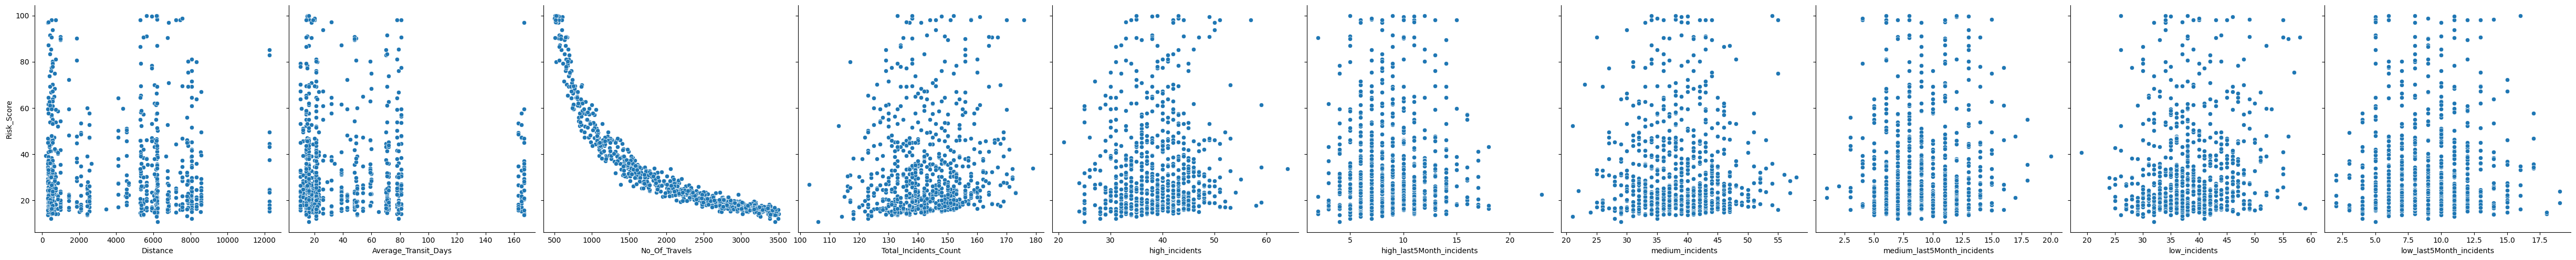

In [40]:
import seaborn as sns

sns.pairplot(new_df_routes, x_vars = ['Distance',	'Average_Transit_Days',	'No_Of_Travels',	'Total_Incidents_Count'	,	'high_incidents',	'high_last5Month_incidents'	,'medium_incidents'	,'medium_last5Month_incidents',	'low_incidents',	'low_last5Month_incidents'],
             
             y_vars = 'Risk_Score', size = 5, kind = 'scatter')

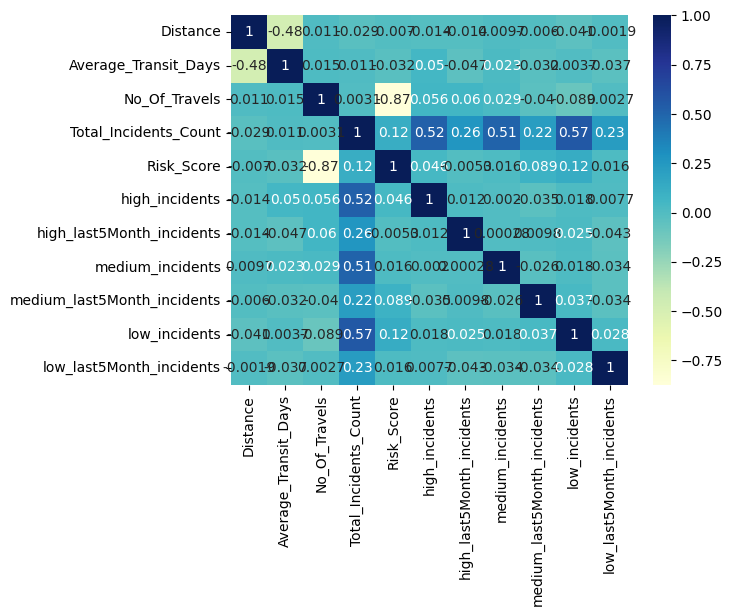

In [41]:
sns.heatmap(new_df_routes.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [42]:
# Split data into features and target variable
X = new_df_routes.drop(columns=['Risk_Score'])
y = new_df_routes['Risk_Score']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the first few predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

Mean Squared Error: 112.87198516329778
        Actual  Predicted
158  25.188324  30.276716
500  25.011226  31.792757
396  23.393002  27.675166
155  18.823112  18.009604
321  80.986938  61.044603


In [48]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluating models
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse}')


# Display the first few predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print(predictions_df.head())

Random Forest Mean Squared Error: 5.153754973540482
        Actual  Predicted
158  25.188324  25.936056
500  25.011226  24.427882
396  23.393002  22.836186
155  18.823112  19.510005
321  80.986938  78.951812


In [ ]:
# Create a Pandas Series to store the predicted scores
predicted_scores_series = pd.Series(predicted_scores, index=new_data.index, name='Predicted_Risk_Score')

print(predicted_scores_series)

In [49]:
import pickle

In [50]:
# Serialize the model to a file
with open('risk_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [51]:
# Serialize the model to a file
with open('risk_randomforest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)